<a href="https://colab.research.google.com/github/aramirezf05/Buscaminas/blob/main/DigitosPBD_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


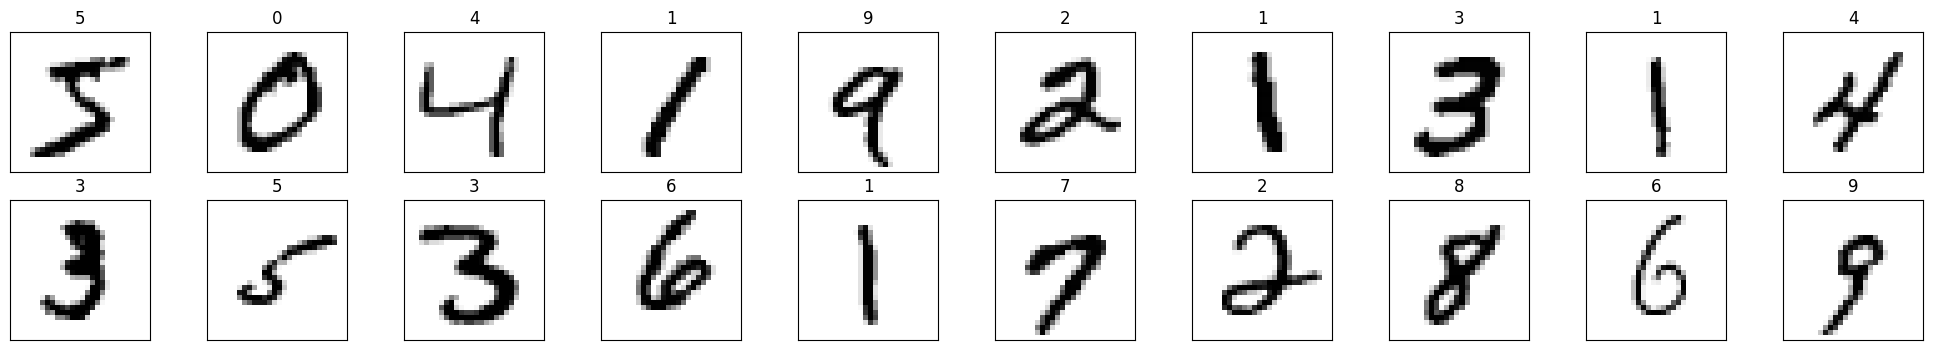

Number of images in the training set: 60000
Number of images in the test set: 10000
313/313 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8913
Test accuracy: 0.8913000226020813
313/313 [==============================] - 1s 2ms/step
Prediction: 7
313/313 [==============================] - 1s 2ms/step
Prediction: 2
313/313 [==============================] - 0s 1ms/step
Prediction: 1
313/313 [==============================] - 0s 1ms/step
Prediction: 0
313/313 [==============================] - 0s 1ms/step
Prediction: 4
313/313 [==============================] - 1s 2ms/step
Prediction: 1
313/313 [==============================] - 1s 2ms/step
Prediction: 4
313/313 [==============================] - 0s 1ms/step
Prediction: 9


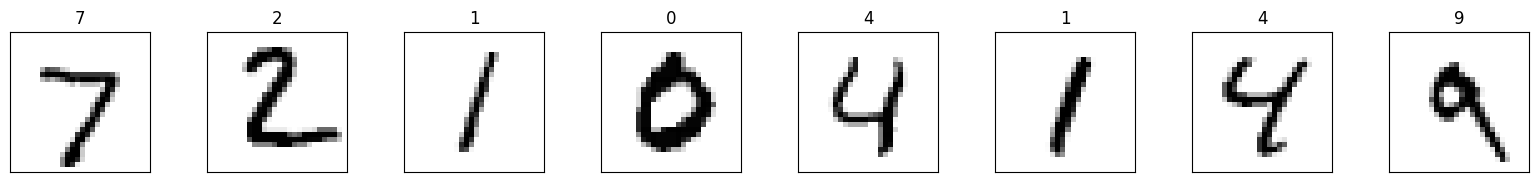

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST y desempaquetar solo el conjunto de entrenamiento
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Visualizar algunos datos de entrenamiento (comentado)
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.set_title(str(y_train[idx]))

plt.show()


# Preprocesar los datos de entrenamiento
x_train = x_train.reshape(60000, 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=10)

# Imprimir el número de imágenes en el conjunto de entrenamiento
print("Number of images in the training set:", x_train.shape[0])

# Definir el modelo de red neuronal
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar el modelo con la función de pérdida, optimizador y métrica
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, verbose=0)

# Cargar el conjunto de datos de prueba MNIST
_, (x_test_, y_test_)= tf.keras.datasets.mnist.load_data()

# Preprocesar los datos de prueba
x_test = x_test_.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test_, num_classes=10)

# Imprimir el número de imágenes en el conjunto de prueba
print("Number of images in the test set:", x_test.shape[0])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Visualizar las 8 primeras imagenes del conjunto de prueba
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(x_test_[idx], cmap=plt.cm.binary)
    ax.set_title(str(y_test_[idx]))
    predictions = model.predict(x_test)
    print("Prediction:", np.argmax(predictions[idx]))

